# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



(3, 400, 400)
cycles per cm: 1; minimum: 0.0; maximum: 255.0
cycles per cm: 3; minimum: 0.0; maximum: 255.0
cycles per cm: 5; minimum: 0.0; maximum: 255.0


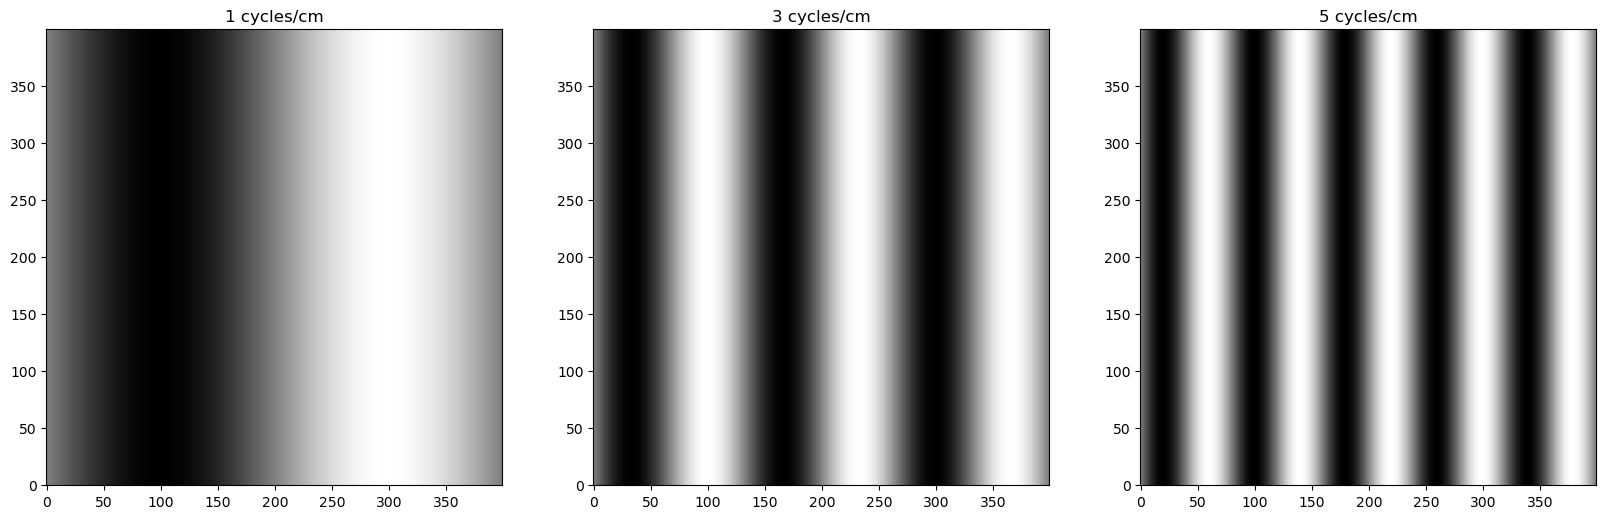

In [2]:
#Reference:
# https://www.javatpoint.com/numpy-meshgrid#:~:text=The%20numpy%20module%20of%20Python,function%20returns%20the%20coordinate%20matrices.
# https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html
from math import pi
from matplotlib import cm
blank_img=np.zeros([400,400])
X=np.linspace(-0.5,0.5,400)
Y=np.linspace(-0.5,0.5,400)
x,y=np.meshgrid(X,Y)
cycles=[1,3,5]
z_array=np.ones([3,400,400])
print(np.shape(z_array))
fig1, ax1 = plt.subplots(nrows=1,ncols=len(cycles), figsize=(20,20))
for i in range(len(cycles)):
    z_array[i,:,:]=np.sin(2*pi*x*cycles[i])
    z_array[i,:,:]=z_array[i,:,:]-np.min(z_array[i,:,:])*np.ones(len(z_array[i,:,:]))
    z_array[i,:,:]=z_array[i,:,:]*255/np.max(z_array[i,:,:])
    print(f'cycles per cm: {cycles[i]}; minimum: {np.min(z_array[i,:,:])}; maximum: {np.max(z_array[i,:,:])}')
    im=ax1[i].imshow(z_array[i,:,:],cmap='gray',origin='lower')#cmap='magma'
    ax1[i].set_title(str(cycles[i])+" cycles/cm")
#fig1.colorbar(im, shrink=0.3, aspect=10)
#fig1.colorbar(ax1)
#z1
#z1=np.sin(2*x*pi)
#z1=z1-np.min(z1)*np.ones(len(z1))
#z1=z1*255/np.max(z1)
#z2
#z2=np.sin(2*3*x*pi)
#z2=z2-np.min(z2)*np.ones(len(z2))
#z2=z2*255/np.max(z2)
#z3
#z3=np.sin(2*5*x*pi)
#z3=z3-np.min(z3)*np.ones(len(z3))
#z3=z3*255/np.max(z3)




In [3]:
"""fig2 = plt.figure(figsize=(20,20))
ax2=fig2.add_subplot(1,3,1,projection='3d')
surf = ax2.plot_surface(x, y, z_array[0,:,:], rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax2=fig2.add_subplot(1,3,2,projection='3d')
surf = ax2.plot_surface(x, y, z_array[1,:,:], rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax2=fig2.add_subplot(1,3,3,projection='3d')
surf = ax2.plot_surface(x, y, z_array[2,:,:], rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)"""

"fig2 = plt.figure(figsize=(20,20))\nax2=fig2.add_subplot(1,3,1,projection='3d')\nsurf = ax2.plot_surface(x, y, z_array[0,:,:], rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)\nax2=fig2.add_subplot(1,3,2,projection='3d')\nsurf = ax2.plot_surface(x, y, z_array[1,:,:], rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)\nax2=fig2.add_subplot(1,3,3,projection='3d')\nsurf = ax2.plot_surface(x, y, z_array[2,:,:], rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)"

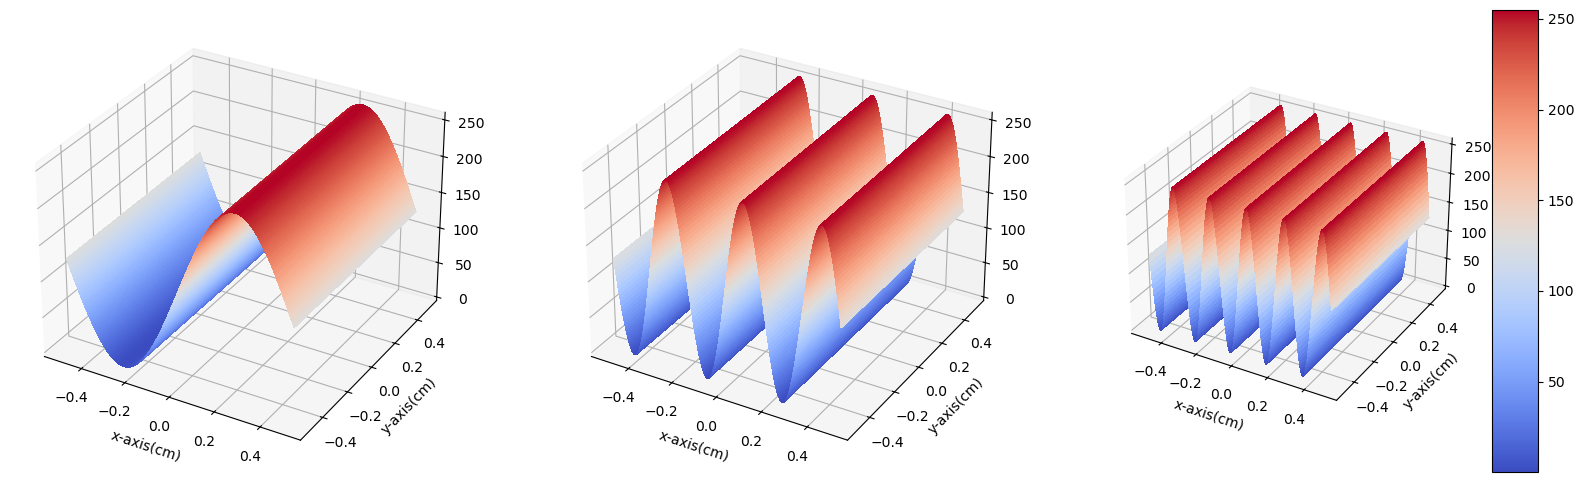

In [4]:
fig2 = plt.figure(figsize=(20,20))
for i in range(len(cycles)):
    ax2=fig2.add_subplot(1,3,i+1,projection='3d') # may +1 because of subplot indexing which is (1,2,3,..) instead of (0,1,2,..)
    surf = ax2.plot_surface(x, y, z_array[i,:,:], rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax2.set_xlabel('x-axis(cm)')
    ax2.set_ylabel('y-axis(cm)')
    ax2.set_zlim(0, 255)
fig2.colorbar(surf, shrink=0.3, aspect=10)

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

[]

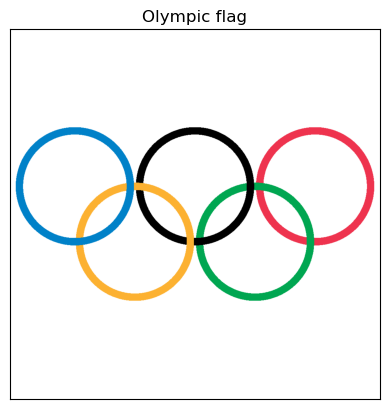

In [33]:
#References:
# Olympic flag Color https://www.color-hex.com/color-palette/7906
# Olympic flag Dimensions: https://tex.stackexchange.com/questions/110614/improve-pstricks-code-for-drawing-of-the-olympic-flag
blank_img=np.ones([1024,1024,3])
img=blank_img*255
X=np.linspace(-10,10,1024)
Y=np.linspace(-10,10,1024)
x,y=np.meshgrid(X,Y)
R=3
R_thick=0.2
cx=np.array([-6.5,-3.25,0,3.25,6.5])
cy=np.array([1.5,-1.5,1.5,-1.5,1.5])
Rgb=np.array([[0,252,0,0,238],
              [129,177,0,166,51],
              [200,49,0,81,78]])
for i in range(3):
    ma=np.logical_and(((x-cx[0])**2+(y-cy[0])**2<(3.2)**2), ((x-cx[0])**2+(y-cy[0])**2>(2.8)**2))
    mb=np.logical_and(((x-cx[1])**2+(y-cy[1])**2<(3.2)**2), ((x-cx[1])**2+(y-cy[1])**2>(2.8)**2))
    mc=np.logical_and(((x-cx[2])**2+(y-cy[2])**2<(3.2)**2), ((x-cx[2])**2+(y-cy[2])**2>(2.8)**2))
    md=np.logical_and(((x-cx[3])**2+(y-cy[3])**2<(3.2)**2), ((x-cx[3])**2+(y-cy[3])**2>(2.8)**2))
    me=np.logical_and(((x-cx[4])**2+(y-cy[4])**2<(3.2)**2), ((x-cx[4])**2+(y-cy[4])**2>(2.8)**2))
    img[:,:,i]=np.select([ma,mb,mc,md,me],Rgb[i,:],255)#Rgb[i,:]
img=np.uint8(img)

fig1, ax1 = plt.subplots()
ax1.imshow(img, origin='lower')
ax1.set_title('Olympic flag')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
#print(np.shape(ma))
#for ii in range(3):
#    for i in range(5):
#        ma=np.ones([5,1024,1024])
#        ma[i,:,:] = np.logical_and(((x-cx[i])**2+(y-cy[i])**2<(R+R_thick)**2), ((x-cx[i])**2+(y-cy[i])**2>(R+R_thick)**2))
#        print(ma.shape)
#    case=np.select([ma[0,:,:],ma[1,:,:],ma[2,:,:],ma[3,:,:],ma[4,:,:]],[Rgb[ii,0],Rgb[ii,1],Rgb[ii,2],Rgb[ii,3],Rgb[ii,4]])

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

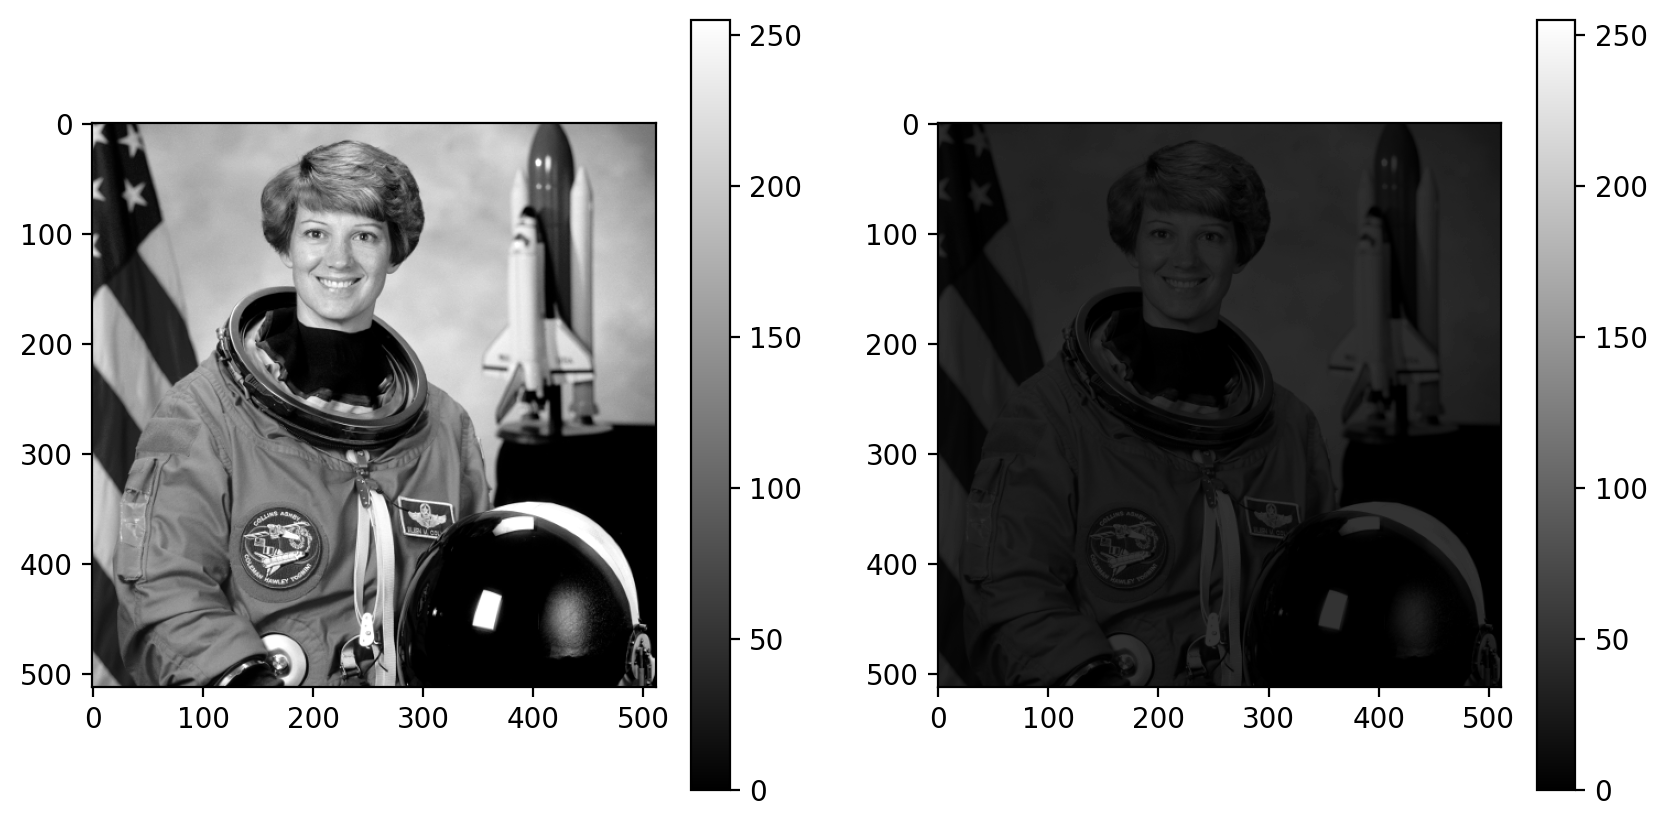

In [7]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.